# Regresión lineal con SciPy

La librería científica SciPy cuenta con una implementación de la regresión lineal en la función `scipy.stats.linregress(x, y)` el cual es usado para ajustar una línea sobre un conjunto de puntos $(x_i, y_i)$. En esta sección veremos un ejemplo de uso de esta función.

## Conjunto de datos

Para esta sección usaremos los datos (fueron generados artificialmente) que se encuentran en el archivo `data.csv`. Primero guardaremos todos estos datos en un DataFrame

In [10]:
import pandas as pd

dataset_df = pd.read_csv('data.csv')
dataset_df

,x,y
0,-10.000000,-28.946313
1,-9.797980,-31.652094
2,-9.595960,-23.838464
3,-9.393939,-28.596168
4,-9.191919,-23.802594
...,...,...
95,9.191919,26.794245
96,9.393939,25.337756
97,9.595960,25.940753
98,9.797980,33.006754


In [11]:
dataset_df.shape

(100, 2)

Ahora grafiquemos estos datos con ayuda de la librería `matplotlib`

Text(0.5, 1.0, 'y vs x')

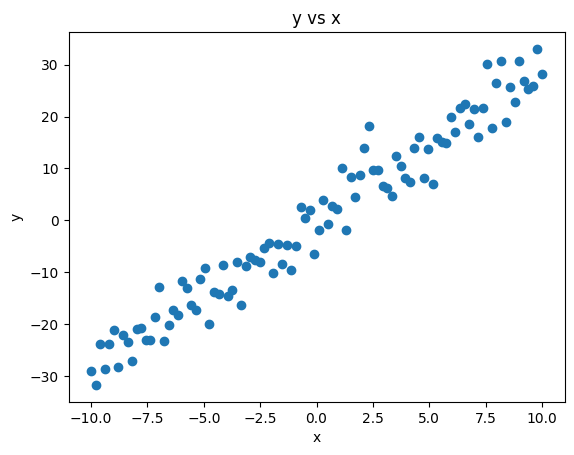

In [20]:
import matplotlib.pyplot as plt

plt.scatter(dataset_df['x'], dataset_df['y'])

plt.xlabel('x')
plt.ylabel('y')

plt.title('y vs x')

Observando los datos graficados, podemos observar que una función lineal puede capturar la naturaleza de estos datos. 

## Ajustar una función lineal con SciPy

Para el caso de una función lineal $y=ax+b$, nuestros parámtros a buscar será su pendiente ($a$) y el término independiente o también llamado interceptor ($b$). A la función `scipy.stats.linregress` le podemos pasar como parámetros nuestro conjunto de datos $x$ e $y$, y nos retornará la pendiente y el interceptor como respuesta

In [15]:
from scipy import stats

solution = stats.linregress(dataset_df['x'], dataset_df['y'])

La pendiente de la solución se encuentra en `solution.slope` y el interceptor, en `solution.intercept`:

In [16]:
a_est = solution.slope
b_est = solution.intercept

print('La ajuste estimado para f es: y = ' + str(a_est) + ' x + ' + str(b_est))

La ajuste estimado para f es: y = 2.8806511108648927 x + 0.21563130200535605


## Análisis de la solución

Ahora que ya obutvimos un resultado, verifiquemos si la solución es buena o no. Para esto, lo analizaremos de dos maneras: cualitativamente (de manera visual) y cuantitativamente (de manera numérica y métricas).



### Análisis cualitativo

Vamos a dibujar los puntos y la función que se obtuvo, y veamos si el ajuste es bueno o no

In [18]:
def plot_func(f, params, xs, legend):
    ys = f(xs, *params)
    plt.plot(xs, ys, label=legend)

def line_func(x, a, b):
  #(a,b) = params
  return a*x + b

Text(0.5, 1.0, 'y vs x')

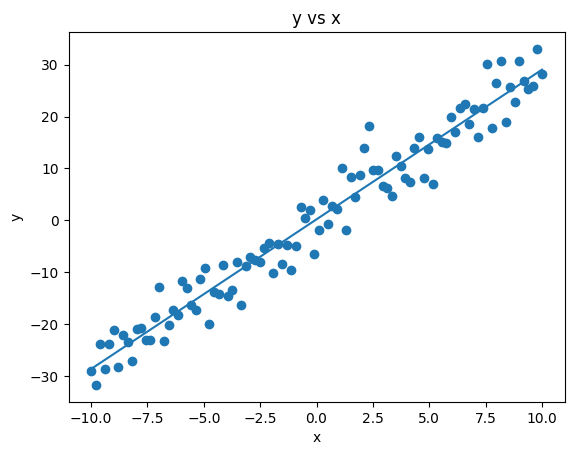

In [21]:
plt.scatter(dataset_df['x'], dataset_df['y'])
plot_func(line_func, (a_est, b_est), dataset_df['x'], 'Línea estimada')

plt.xlabel('x')
plt.ylabel('y')

plt.title('y vs x')